Objective:- Model to identify how likely certain target groups customers respond to the marketing campaign

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import train data

In [2]:
df=pd.read_excel("/Users/kuriankgeorge/Desktop/aws/Capstone/07_Propensify/data/Propensify/train.xlsx")

In [3]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [4]:
df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

Understanding the missing values

In [5]:
df.isnull().sum()/len(df)

custAge           0.244660
profession        0.000243
marital           0.000243
schooling         0.292233
default           0.000243
housing           0.000243
loan              0.000243
contact           0.000243
month             0.000243
day_of_week       0.095752
campaign          0.000243
pdays             0.000243
previous          0.000243
poutcome          0.000243
emp.var.rate      0.000243
cons.price.idx    0.000243
cons.conf.idx     0.000243
euribor3m         0.000243
nr.employed       0.000243
pmonths           0.000243
pastEmail         0.000243
responded         0.000243
profit            0.887136
id                0.000243
dtype: float64

Understand shape of df

In [6]:
df.shape

(8240, 24)

Profit column is with 88% missing values. So remove the column

In [7]:
df.drop(columns=['profit'],inplace=True)

Let us remove the columns that are not significant

In [8]:
df.drop(columns=['contact','month','day_of_week','campaign','pdays','id'],inplace=True)

In [9]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no
1,31.0,services,single,high.school,no,no,no,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no
2,NaN,admin.,single,high.school,no,no,no,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4,39.0,blue-collar,single,NaN,unknown,yes,no,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no


Filling the missing values by mode or median of corresponding columns

In [10]:
col_mode=['profession','marital','schooling','default','housing','loan','previous','poutcome','pmonths','pastEmail','responded']
col_median=['custAge','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [11]:
mode_values={}
median_values={}

In [12]:
#storing mode and median values to dictionary to use later
for col in col_mode:
    mode_values[col+'_mode']=df[col].mode()[0]
    df[col].fillna(df[col].mode()[0],inplace=True)
for col in col_median:
    median_values[col+'_mode']=df[col].median()
    df[col].fillna(df[col].median(),inplace=True)

In [13]:
mode_values

{'profession_mode': 'admin.',
 'marital_mode': 'married',
 'schooling_mode': 'university.degree',
 'default_mode': 'no',
 'housing_mode': 'yes',
 'loan_mode': 'no',
 'previous_mode': 0.0,
 'poutcome_mode': 'nonexistent',
 'pmonths_mode': 999.0,
 'pastEmail_mode': 0.0,
 'responded_mode': 'no'}

In [14]:
median_values

{'custAge_mode': 38.0,
 'emp.var.rate_mode': 1.1,
 'cons.price.idx_mode': 93.444,
 'cons.conf.idx_mode': -41.8,
 'euribor3m_mode': 4.857,
 'nr.employed_mode': 5191.0}

Ensuring no missing values present in df

In [15]:
df.isnull().sum()/len(df)

custAge           0.0
profession        0.0
marital           0.0
schooling         0.0
default           0.0
housing           0.0
loan              0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
pmonths           0.0
pastEmail         0.0
responded         0.0
dtype: float64

Understand the distribution of age

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


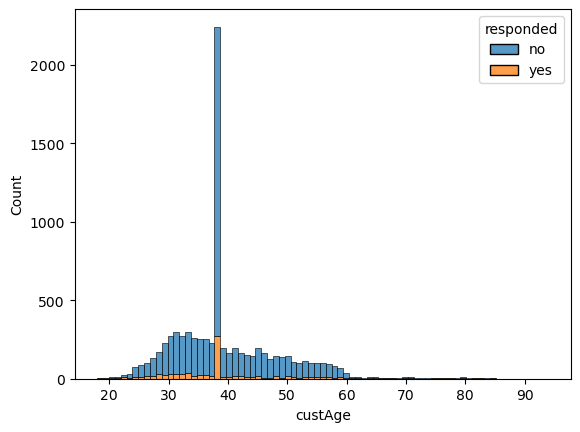

In [16]:
sns.histplot(data=df,x='custAge',hue='responded',multiple='stack')
plt.show()

There is no significant relationship between age and target

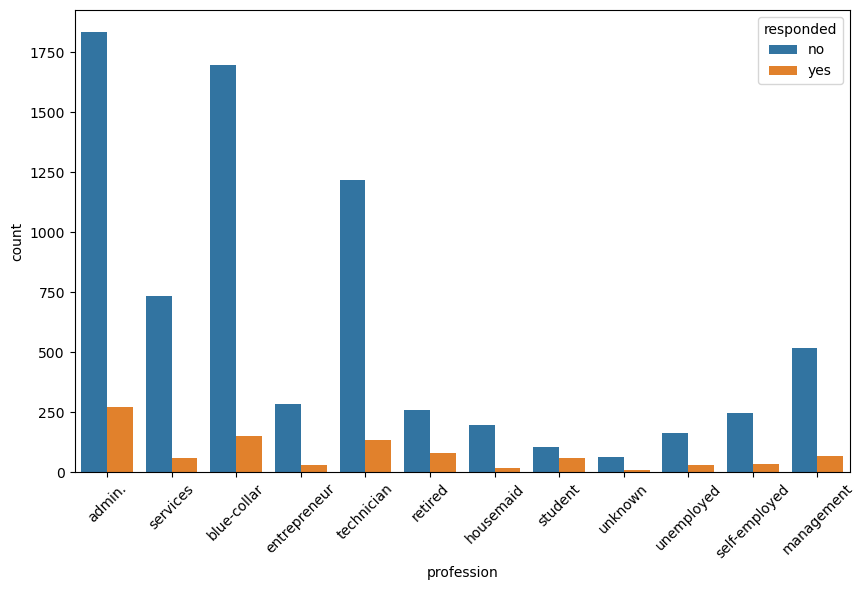

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='profession',hue='responded')
plt.xticks(rotation=45)
plt.show()

In the dataset majority of the people are with 'admin' job. The ratio of the people responded 'yes' from 'service' is less compared to admin

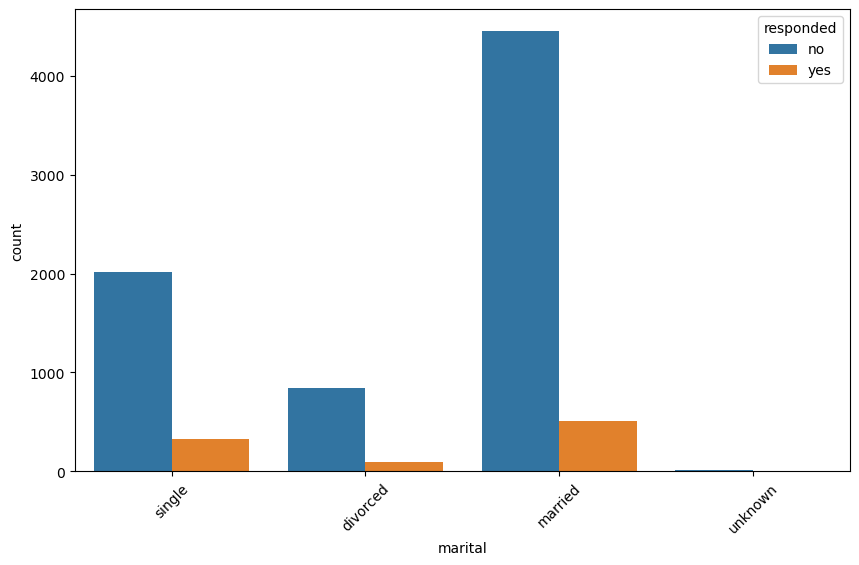

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='marital',hue='responded')
plt.xticks(rotation=45)
plt.show()

in the dataset majority of the people are married

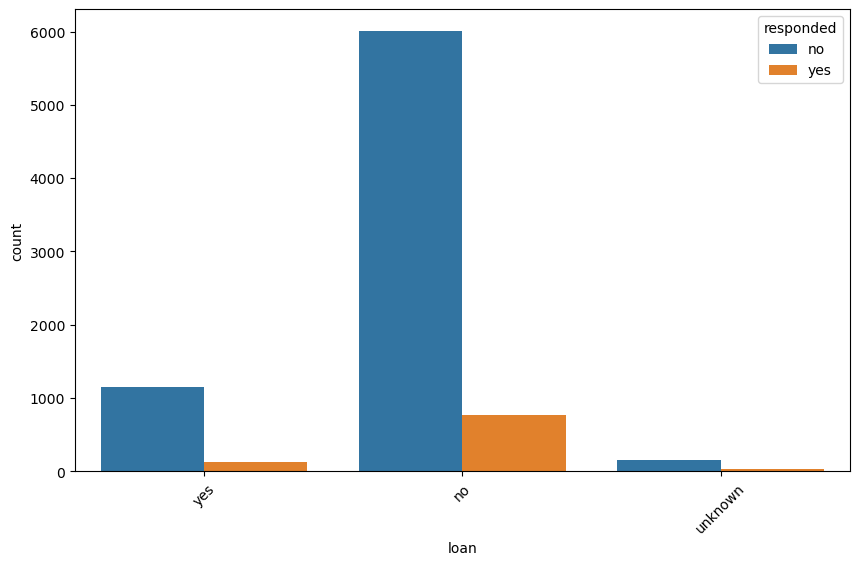

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='loan',hue='responded')
plt.xticks(rotation=45)
plt.show()

in the dataset majority of the people dont have loan

Converting target column to numeric

In [20]:
df['responded']=df['responded'].apply(lambda x: 0 if x=='no' else 1)

Splitting dependent and independent variables

In [21]:
X=df.drop(columns=['responded'])
y=df['responded']

Scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
numerical_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(drop='first',sparse=False)

In [24]:
num_columns=['custAge','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_columns=[col for col in X.columns if col not in num_columns]

In [25]:
cat_columns

['profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'previous',
 'poutcome',
 'pmonths',
 'pastEmail']

In [26]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,num_columns),
        ('cat',categorical_transformer,cat_columns)
    ])

In [27]:
X=preprocessor.fit_transform(X)

In [28]:
encoded_cat_columns=preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

In [29]:
encoded_cat_columns=list(encoded_cat_columns)

In [30]:
X=pd.DataFrame(X,columns=num_columns+encoded_cat_columns)

Splitting the data for validation

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

For modeling Random forest classifier is used

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [34]:
rf = RandomForestClassifier(random_state=42)

Define hyperparameters

In [35]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [0.025,0.05,0.1,0.25,0.5],     # Minimum number of samples to split an internal node     
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

In [36]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

In [37]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [0.025, 0.05, 0.1,
                                                              0.25, 0.5],
                                        'n_estimators': [10, 20, 50, 100]},
                   random_state=42, verbose=2)

Finding best parameters

In [38]:
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 0.025, 'max_depth': 30, 'bootstrap': False}


Fitting best parameters

In [39]:
best_rf = rf_random.best_estimator_

In [40]:
y_pred = best_rf.predict(X_train)

In [41]:
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on the train set: {accuracy}")

Accuracy on the train set: 0.9050701186623517


So the accuracy of test data is 90%

Saving the model

In [42]:
import pickle

In [43]:
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

validating the model

In [44]:
y_pred_valid = best_rf.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Accuracy on the validation set: {accuracy_valid}")

Accuracy on the validation set: 0.8907766990291263


We can see 89% validation accuracy

Load and Prediction using test data

Transform the test data

In [45]:
test_df=pd.read_excel("/Users/kuriankgeorge/Desktop/aws/Capstone/07_Propensify/data/Propensify/test.xlsx")

In [46]:
test_df.shape

(32950, 22)

In [47]:
test_df.isnull().sum()

custAge           8042
profession           0
marital              0
schooling         9770
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week       3328
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
id                   0
dtype: int64

In [48]:
test_df=test_df.dropna()

In [49]:
test_df.shape

(15834, 22)

In [50]:
df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [51]:
test_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'id'],
      dtype='object')

Removing columns that was not used for training

In [52]:
col_remove=[col for col in test_df.columns if col not in df.columns]

In [53]:
test_df.drop(columns=col_remove,inplace=True)

In [54]:
test_df=preprocessor.fit_transform(test_df)
encoded_cat_columns=preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
encoded_cat_columns=list(encoded_cat_columns)
test_df=pd.DataFrame(test_df,columns=num_columns+encoded_cat_columns)

Checking columm labels are matching for train and test df

In [55]:
print(len(X.columns))
print(len(test_df.columns))

79
80


Identifying the extra column and removing

In [56]:
col_remove=[col for col in test_df.columns if col not in X.columns]

In [57]:
test_df.drop(columns=col_remove,inplace=True)

In [58]:
col_add=[col for col in X.columns if col not in test_df.columns]

In [59]:
col_add

['previous_1.0',
 'previous_2.0',
 'previous_3.0',
 'previous_4.0',
 'previous_5.0',
 'previous_6.0',
 'pmonths_0.633333333333333',
 'pmonths_0.833333333333333',
 'pastEmail_1.0',
 'pastEmail_2.0',
 'pastEmail_3.0',
 'pastEmail_4.0',
 'pastEmail_5.0',
 'pastEmail_6.0',
 'pastEmail_7.0',
 'pastEmail_8.0',
 'pastEmail_9.0',
 'pastEmail_10.0',
 'pastEmail_12.0',
 'pastEmail_14.0',
 'pastEmail_15.0',
 'pastEmail_16.0',
 'pastEmail_18.0',
 'pastEmail_25.0']

[CV] END bootstrap=False, max_depth=10, min_samples_split=0.05, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_split=0.025, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.25, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_split=0.1, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.025, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.1, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.05, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.1, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.25, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, min_samples_split=0.25, n_estimators=50; total time=   0.5s


In [60]:
for col in col_add:
    test_df[col] = 0

In [62]:
len(test_df.columns)

79

Predicting the label and probability

In [63]:
y_pred_test = best_rf.predict(test_df)
y_pred_proba_test = best_rf.predict_proba(test_df)
prob_df = pd.DataFrame(y_pred_proba_test, columns=['prob_class_0', 'prob_class_1'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [64]:
prob_df.head()

,prob_class_0,prob_class_1
0,0.558519,0.441481
1,0.666706,0.333294
2,0.835581,0.164419
3,0.844528,0.155472
4,0.823418,0.176582


adding the predicted lable to prob_df

In [66]:
prob_df['prediction']=y_pred_test

In [70]:
prob_df.head()

,prob_class_0,prob_class_1,prediction
0,0.558519,0.441481,0
1,0.666706,0.333294,0
2,0.835581,0.164419,0
3,0.844528,0.155472,0
4,0.823418,0.176582,0
